In [1]:
import warnings; warnings.filterwarnings('ignore')

from time import time

import numpy as np
import pandas as pd
from scipy import optimize as opt
from scipy import io as spio

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="darkgrid")

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# load data
mat=spio.loadmat('machine-learning-ex4/ex4/ex4data1.mat')
X,y=mat['X'],mat['y']

mat=spio.loadmat('machine-learning-ex4/ex4/ex4weights.mat')
theta1,theta2=mat['Theta1'],mat['Theta2']

print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


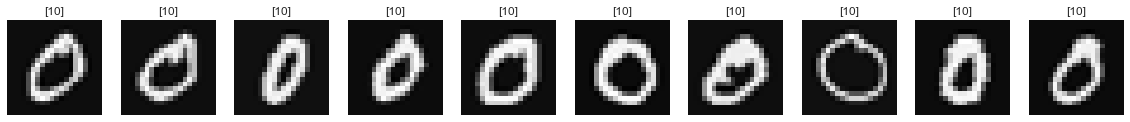

In [3]:
# visualize the data (first 10 samples)
width,height=20,20
fig=plt.figure(figsize=(20,20))
for i in range(10): 
    square=X[i].reshape(width,height).T
    ax=fig.add_subplot(1,10,i+1,xticks=[],yticks=[])
    ax.imshow(square,cmap='gray')
    ax.set_title(str(y[i]))

In [4]:
# define sigmoid function and sigmoid_prime
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

# define function to randomly initialize weights
def rand_ini_wgts(input_size,output_size):
    epsilon=0.12
    return np.random.uniform(-epsilon,epsilon,(output_size,input_size+1))

# define regularized cost and gradient functions for neural network with one hidden layer
def cost_and_grad(theta1,theta2,X,y,alpha):
    # forward prop and cost
    ohe=OneHotEncoder(sparse=False) # return array, not sparse to perform vectorized operations
    y_ohe=ohe.fit_transform(y)
    sample_size=X.shape[0]
    ones=np.ones((sample_size,y_ohe.shape[1]))
    X_bias=np.insert(X,0,1,axis=1)
    z=np.dot(X_bias,theta1.T)
    a=sigmoid(z)
    a_bias=np.insert(a,0,1,axis=1)
    h=sigmoid(np.dot(a_bias,theta2.T))
    term1=np.multiply(y_ohe,np.log(h))
    term2=np.multiply((ones-y_ohe),np.log(1-h))
    cost=-np.sum(np.add(term1,term2))/sample_size\
    +alpha/(2*sample_size)*(np.sum(np.square(theta1[:,1:]))+np.sum(np.square(theta2[:,1:])))
    
    # backward prop and gradient
    delta_3=h-y_ohe
    z_bias=np.insert(z,0,1,axis=1)
    delta_2=(np.dot(delta_3,theta2)*sigmoid_prime(z_bias))[:,1:]
    grad_1=np.dot(delta_2.T,X_bias)/sample_size+alpha/sample_size*(np.insert(theta1[:,1:],0,0,axis=1))
    grad_2=np.dot(delta_3.T,a_bias)/sample_size+alpha/sample_size*(np.insert(theta2[:,1:],0,0,axis=1))
    grad=np.hstack([grad_1.ravel(),grad_2.ravel()])
    
    return cost.ravel(),grad

# define function to compute gradient numerically (to be coded...)
#def numeric_grad(theta1,theta2,X,y,alpha):
    #epsilon=1e-4

In [5]:
# test cost function with no regularization
alpha=0
cost_test,grad_test=cost_and_grad(theta1,theta2,X,y,alpha)

print('Cost at parameters loaded from ex4weights: {0:.6f}'.format(np.asscalar(cost_test)))

Cost at parameters loaded from ex4weights: 0.287629


In [6]:
# test cost function with regularization strength of 1
alpha=1
cost_test,grad_test=cost_and_grad(theta1,theta2,X,y,alpha)

print('Cost at parameters loaded from ex4weights: {0:.6f}'.format(np.asscalar(cost_test)))

Cost at parameters loaded from ex4weights: 0.383770


In [7]:
# test sigmoid gradient
print('Sigmoid gradient at inputs of [-1 -0.5 0 0.5 1]: {}'.format(sigmoid_prime(np.array([-1,-0.5,0,0.5,1]))))

Sigmoid gradient at inputs of [-1 -0.5 0 0.5 1]: [ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]


In [8]:
# one-hot-encode the labels
y[y==10]=0
y_ohe=np_utils.to_categorical(y,10)

In [9]:
model=Sequential()
model.add(Dense(units=25,activation='relu',input_dim=400))
model.add(Dense(units=10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                10025     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 10,285
Trainable params: 10,285
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [11]:
model.fit(X,y_ohe,epochs=50,batch_size=50,verbose=0);

In [12]:
score=model.evaluate(X,y_ohe,verbose=0)[1]*100 # returns accuracy score

print('Accuracy: {}%'.format(score))

Accuracy: 92.36%
